In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('market_file.csv', sep = ',')
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


<h1 style='background-color:#B7EBA7'>Ячейка с кодом</h1>

In [19]:

def stacked_barplots(cat_col, division_col, df, figsize=(10, 6), colormap='Set1'):
    """
    Функция для построения столбчатых диаграмм с разделением на группы и отображением процентов.

    Входные параметры:
    - cat_col: list (список категориальных колонок, для которых строится диаграмма)
    - division_col: str (колонка, по которой происходит разделение на группы)
    - df: DataFrame (входной датасет, который содержит данные для построения графиков)
    - figsize: tuple (размер графика; по умолчанию (10, 6))
    - colormap: str (цветовая палитра для графика; по умолчанию 'Set1')

    Функция проходит по всем категориальным колонкам в cat_col, строит для каждой столбчатую диаграмму
    с разделением на группы по division_col и отображает проценты на каждом столбце.
    """
    
    for cat in cat_col:
        table = df.pivot_table(index=cat, columns=division_col, aggfunc='size', fill_value=0)
        table = table.loc[table.sum(axis=1).sort_values().index]
        ax = table.plot(kind='bar', stacked=True, figsize=figsize, colormap=colormap)
        table_percent = table.div(table.sum(axis=1), axis=0) * 100
        
        for i in range(len(table.index)):
            for j in range(len(table.columns)):
                height = table.iloc[i, j]
                percentage = table_percent.iloc[i, j]
                if height > 0:
                    ax.text(i, height / 2 + table.iloc[i, :j].sum(), f'{percentage:.1f}%', ha='center', va='center', color='black')
        
        plt.xlabel(cat)
        plt.ylabel('Количество')
        plt.title(f'Столбчатая диаграмма для {cat} с разделением на группы')
        plt.xticks(rotation=45)
        plt.legend(title='Group')
        plt.tight_layout()
        plt.show()

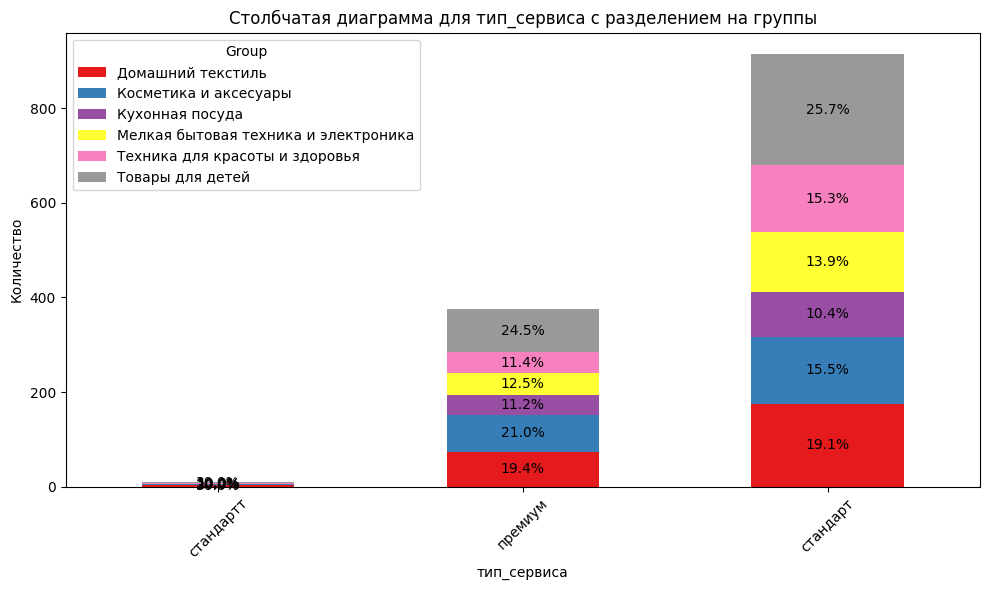

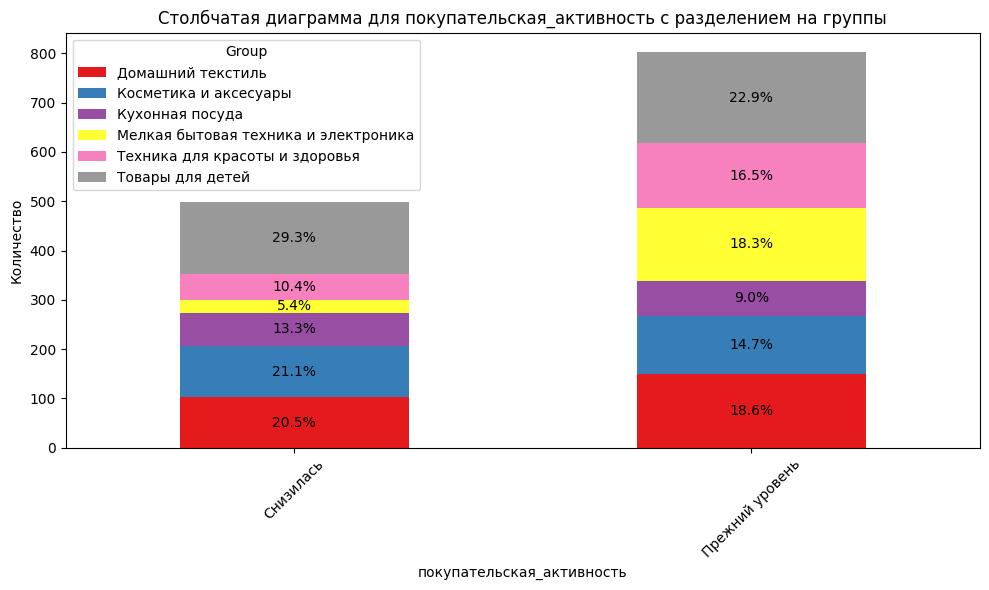

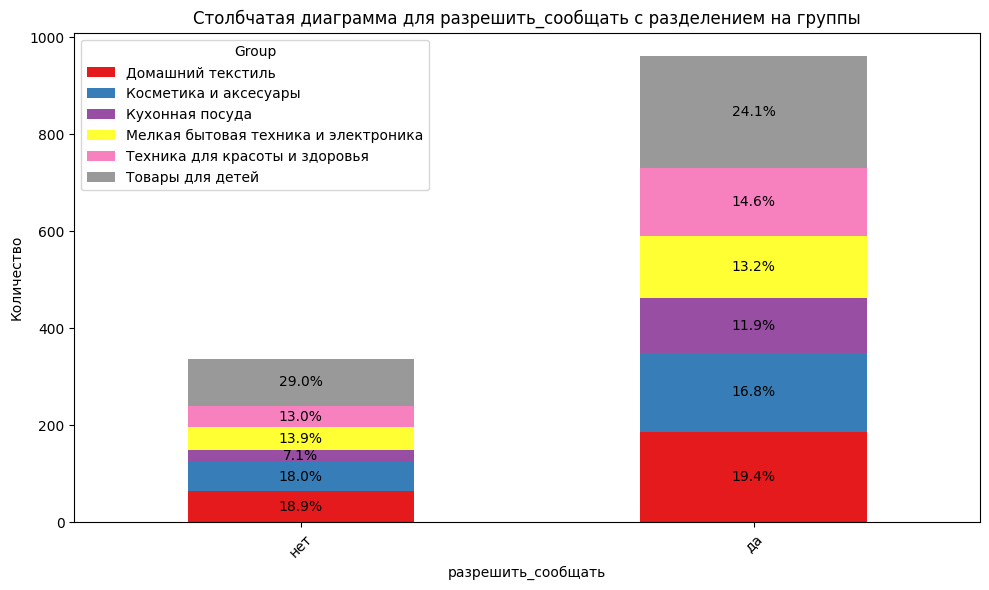

In [20]:
cat_col = ['тип_сервиса', 'покупательская_активность', 'разрешить_сообщать']
division_col = 'популярная_категория'
stacked_barplots(cat_col, division_col, df)